### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [15]:
import pandas as pd
print(pd.__version__)

2.2.2


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [16]:
data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# head() 함수 맨위에서부터
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [18]:
# tail() 함수 맨뒤에서부터
data.tail()


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [19]:
# sample() 함수
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
204,204,102371,공주,4,10,940.71,충청남도,공주시
146,146,140595,서울종로,6,3,23.90,서울특별시,종로구
32,32,668089,안산,3,6,144.78,경기도,안산시


In [20]:
# 컬렴명 확인하기
print(f'컬럼명 = {data.columns}')

# 인덱스 확인하기
print(f'인덱스 = {data.index}')


컬럼명 = Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 = RangeIndex(start=0, stop=229, step=1)


In [21]:
# values 속성으로 값 확인하기
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [22]:
# info() 함수
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [23]:
# 모든 컬럼의 타입 확인
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [24]:
# 면적 컬럼의 타입을 확인
print(type(data['면적']))
print(type(data.면적)) #컬럼명에 공백이 없을 경우에만 사용가능함
data['면적'].dtypes


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


dtype('float64')

In [25]:
# 특정컬럼(인구수)의 타입 확인
print(type(data['인구수']))
data['인구수'].dtypes


<class 'pandas.core.series.Series'>


dtype('int64')

In [26]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()

data.describe(include=[np.number])


NameError: name 'np' is not defined

In [ ]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
import numpy as np
data.describe(include=[object])


,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [ ]:
data['행정구역'] == '동구'

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [ ]:
# 해당 조건식과 매칭되는 Row data 출력
data.loc[data['행정구역'] == '동구']


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [ ]:
# '광역시도' == '경기도' log[row., column]
gy_df = data.loc[data['광역시도'] == '경기도','인구수':'행정구역'].reset_index(drop=True)

In [ ]:
#unique한 광역시도명 출력하기
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
#index를 1부터 시작하도록
import numpy as np

#index 변경하기
gy_df.index = np.arange(1, (len(gy_df)+1))
gy_df.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32')

In [ ]:
gy_df

,인구수,shortName,x,y,면적,광역시도,행정구역
1,53497,가평,9,3,843.040,경기도,가평군
2,955384,고양,4,2,267.330,경기도,고양시
3,63227,과천,7,7,35.813,경기도,과천시
4,327111,광명,3,3,38.500,경기도,광명시
5,290210,광주,8,7,431.840,경기도,광주시
6,175676,구리,9,4,33.300,경기도,구리시
7,273302,군포,5,8,36.350,경기도,군포시
8,326523,김포,2,3,276.640,경기도,김포시
9,610300,남양주,8,3,458.440,경기도,남양주시
10,90398,동두천,7,2,95.680,경기도,동두천시


In [ ]:
# describe() 함수, 모든 컬럼의 통계함수 출력
data.describe(include= 'all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]
* loc
    * row 선택 - 조건식, 슬라이싱 [0:20], 특정 인덱스 []

In [ ]:
# 인구수 1개의 컬럼 선택
data['인구수']

0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [ ]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역','인구수','면적']].head()

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25


In [ ]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max():,}")
print(f"인구수 최소값 {data['인구수'].min():,}")
print(f"인구수 평균 {round(data['인구수'].mean()):,}")
print(f"인구수 표준편차 {round(data['인구수'].std()):,}")
print(f"인구수 중간값 {data['인구수'].median():,}")
data['인구수'].quantile([0.25, 0.75])

인구수 최대값 1,125,461
인구수 최소값 8,392
인구수 평균 211,090
인구수 표준편차 207,438
인구수 중간값 140,159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [ ]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_prop 변수에 저장
max_prop = data['인구수'].max()

data.loc[data['인구수'] == max_prop]


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [ ]:
# 면적이 넓은 행정구역?
max_prop = data['면적'].max()
data.loc[data['면적'] == max_prop]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
15,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [ ]:
# 인구수가 가장 적은 행정구역?
min_prop = data['인구수'].min()
data.loc[data['인구수'] == min_prop]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
83,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [ ]:
# unique한 광역시도명
print(len(data['광역시도'].unique()))
data['광역시도'].unique()


17


array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
# 광역시도별 Row Counting
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [ ]:
# data['행정구역'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터 출력하기
data.loc[data['광역시도'] == '경기도',['행정구역', '인구수', '면적']]\
.sort_values(by='인구수', ascending=False)

,행정구역,인구수,면적
30,수원시,1125461,121.090
19,고양시,955384,267.330
40,용인시,915005,591.500
29,성남시,911628,141.820
28,부천시,805473,53.440
32,안산시,668089,144.780
26,남양주시,610300,458.440
34,안양시,566558,58.520
48,화성시,555129,688.100
45,평택시,423763,452.310


In [ ]:
# data['행정구역'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터를 면적을 descending 순서대로 출력하기
data.loc[data['광역시도'] == '경기도',['행정구역', '인구수', '면적']]\
.sort_values(by='면적', ascending = False)\
.reset_index(drop=True)

,행정구역,인구수,면적
0,양평군,95614,877.080
1,가평군,53497,843.040
2,포천시,140159,826.380
3,연천군,41076,695.230
4,화성시,555129,688.100
5,파주시,385528,672.560
6,여주시,100669,608.640
7,용인시,915005,591.500
8,안성시,173061,554.200
9,이천시,190537,461.020


In [ ]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]
gy_df = data.loc[data['광역시도'] == '경기도',['행정구역', '인구수', '면적']]\
.sort_values(by='면적', ascending = False)\
.reset_index(drop=True)

# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2'] = gy_df['인구수'].map('{:,}'.format)
gy_df


In [29]:
#면적 2라는 새로운 컬럼을 생성하면서 면적의 값을 소수점 이하 2자리 map(lambda arg:body)
gy_df['면적2'] = gy_df['면적'].map(lambda val:f"{val:.2f}")
gy_df.head()

,행정구역,인구수,면적,인구수2,면적2
0,양평군,95614,877.08,"95,614",877.08
1,가평군,53497,843.04,"53,497",843.04
2,포천시,140159,826.38,"140,159",826.38
3,연천군,41076,695.23,"41,076",695.23
4,화성시,555129,688.10,"555,129",688.10


In [ ]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
area_1000 = data.loc[data['면적'] > 1000].copy()
# area_1000 DataFrame 객체에 면적2 컬럼을 생성
area_1000['면적2'] = area_1000['면적'].map('{:.2f}'.format)



,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,면적2
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,1040.07
3,3,63986,삼척,11,8,1185.80,강원도,삼척시,1185.80
7,7,34966,영월,10,8,1127.36,강원도,영월군,1127.36
9,9,29260,인제,9,2,1646.08,강원도,인제군,1646.08
10,10,34242,정선,11,6,1220.67,강원도,정선군,1220.67
12,12,264144,춘천,10,3,1116.35,강원도,춘천시,1116.35
14,14,38439,평창,10,6,1463.65,강원도,평창군,1463.65
15,15,62957,홍천,10,4,1817.94,강원도,홍천군,1817.94
68,68,242618,경주,12,12,1323.85,경상북도,경주시,1323.85
72,72,127941,김천,8,11,1009.56,경상북도,김천시,1009.56


### inplace 속성에 대한 설명
* inplace = False 디폴트값 이면 원본데이터를 변경하지 않고, 변경한 내용을 출력만함

In [ ]:
#index를 초기화, 원본을 변경
area_1000.reset_index(drop=True,inplace=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역,면적2
0,0,202520,강릉,11,4,1040.07,강원도,강릉시,1040.07
1,3,63986,삼척,11,8,1185.80,강원도,삼척시,1185.80
2,7,34966,영월,10,8,1127.36,강원도,영월군,1127.36
3,9,29260,인제,9,2,1646.08,강원도,인제군,1646.08
4,10,34242,정선,11,6,1220.67,강원도,정선군,1220.67
5,12,264144,춘천,10,3,1116.35,강원도,춘천시,1116.35
6,14,38439,평창,10,6,1463.65,강원도,평창군,1463.65
7,15,62957,홍천,10,4,1817.94,강원도,홍천군,1817.94
8,68,242618,경주,12,12,1323.85,경상북도,경주시,1323.85
9,72,127941,김천,8,11,1009.56,경상북도,김천시,1009.56


In [ ]:
# axis=0 Row, axis=1 Column
# 'Unnamed: 0' 컬럼(axis=1)을 삭제, 원본을 변경
area_1000.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
# area_100 DataFrame 객체에 면적3 컬럼생성, 면적의 값이 1500보다 큰 경우에 해당하는 조건식
area_1000.loc[area_1000['면적'] > 1500,'면적3'] = area_1000['면적'].map('{:.2f}'.format)

In [46]:
#fillna()를 사용하여 NaN값을 초기화하기
area_1000.fillna(0,inplace=True)

In [47]:
area_1000

,인구수,shortName,x,y,면적,광역시도,행정구역,면적2,면적3
0,202520,강릉,11,4,1040.07,강원도,강릉시,1040.07,0
1,63986,삼척,11,8,1185.80,강원도,삼척시,1185.80,0
2,34966,영월,10,8,1127.36,강원도,영월군,1127.36,0
3,29260,인제,9,2,1646.08,강원도,인제군,1646.08,1646.08
4,34242,정선,11,6,1220.67,강원도,정선군,1220.67,0
5,264144,춘천,10,3,1116.35,강원도,춘천시,1116.35,0
6,38439,평창,10,6,1463.65,강원도,평창군,1463.65,0
7,62957,홍천,10,4,1817.94,강원도,홍천군,1817.94,1817.94
8,242618,경주,12,12,1323.85,경상북도,경주시,1323.85,0
9,127941,김천,8,11,1009.56,경상북도,김천시,1009.56,0


In [48]:
#경기도 인구수의 평균과 표준편차
print(f"경기도 인구수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구수 편차 = {gy_df['인구수'].std()}")

경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876


In [49]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [57]:
import math

#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    sido_df = df.loc[df['광역시도'] == sido_name,'인구수':'행정구역'].copy()
    print(f"{sido_name} 인구수 평균 = {round(sido_df['인구수'].mean()):,}")
    std_pop = sido_df['인구수'].std()
    print(f"{sido_name} 인구수 편차 = {0 if math.isnan(std_pop) else f'{round(std_pop):,}'}")



In [59]:
for sido_name in data['광역시도'].unique():
    pop_mean_std(data, sido_name)
    print("\n")

강원도 인구수 평균 = 79,413
강원도 인구수 편차 = 87,316


경기도 인구수 평균 = 378,845
경기도 인구수 편차 = 304,548


경상남도 인구수 평균 = 174,694
경상남도 인구수 편차 = 245,796


경상북도 인구수 평균 = 109,085
경상북도 인구수 편차 = 124,955


광주광역시 인구수 평균 = 287,642
광주광역시 인구수 편차 = 137,077


대구광역시 인구수 평균 = 297,306
대구광역시 인구수 편차 = 174,375


대전광역시 인구수 평균 = 293,535
대전광역시 인구수 편차 = 111,854


부산광역시 인구수 평균 = 207,724
부산광역시 인구수 편차 = 106,246


서울특별시 인구수 평균 = 375,792
서울특별시 인구수 편차 = 125,231


세종특별자치시 인구수 평균 = 191,233
세종특별자치시 인구수 편차 = 0


울산광역시 인구수 평균 = 221,117
울산광역시 인구수 편차 = 64,163


인천광역시 인구수 평균 = 276,658
인천광역시 인구수 편차 = 199,354


전라남도 인구수 평균 = 77,298
전라남도 인구수 편차 = 74,413


전라북도 인구수 평균 = 124,218
전라북도 인구수 편차 = 168,327


제주특별자치도 인구수 평균 = 287,936
제주특별자치도 인구수 편차 = 201,621


충청남도 인구수 평균 = 129,742
충청남도 인구수 편차 = 141,125


충청북도 인구수 평균 = 134,975
충청북도 인구수 편차 = 223,460




In [60]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [61]:
#iloc[] 사용
#인덱스가 20 부터 24까지
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [ ]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지
data.iloc[20:25, 1:8]

,면적,광역시도,행정구역
20,35.813,경기도,과천시
21,38.500,경기도,광명시
22,431.840,경기도,광주시
23,33.300,경기도,구리시
24,36.350,경기도,군포시


In [65]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60], ['인구수', '광역시도', '행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [66]:
#인덱스가 0인 행 하나만 선택
data.loc[0]

Unnamed: 0          0
인구수            202520
shortName          강릉
x                  11
y                   4
면적            1040.07
광역시도              강원도
행정구역              강릉시
Name: 0, dtype: object

In [67]:
#열 하나만 선택
print(type(data['면적']))
data['면적'].head()

<class 'pandas.core.series.Series'>


0    1040.07
1     664.19
2     180.01
3    1185.80
4     105.25
Name: 면적, dtype: float64

### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [68]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [69]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함 inplace=False
data.rename(columns={'Unnamed: 0':'seq'})


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시


In [77]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
data.rename(columns={'Unnamed: 0':'seq'}, inplace=True)
data.head()

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [78]:
# seq 컬럼을 인덱스로 변경한다 ( 원본 객체가 변경됨 )
data.set_index('seq', inplace=True)
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [86]:
# 인구수의 평균값 구하기
pop_mean_value = data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')


211089.77729257641
211090
211089.78


In [91]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_lf_df = data.loc[data['인구수'] < pop_mean_value, ['광역시도', '행정구역', '인구수']]\
.sort_values(by=['광역시도','인구수'], ascending = [True, False])\
.reset_index(drop=True)


In [93]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_lf_df.to_excel('data/평균인구수미만지역.xlsx')

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [95]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [96]:
data['인구수'].groupby(data['광역시도']).count()

광역시도
강원도        18
경기도        31
경상남도       18
경상북도       23
광주광역시       5
대구광역시       8
대전광역시       5
부산광역시      16
서울특별시      25
세종특별자치시     1
울산광역시       5
인천광역시      10
전라남도       22
전라북도       14
제주특별자치도     2
충청남도       15
충청북도       11
Name: 인구수, dtype: int64

In [ ]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum()

In [ ]:
# 광역시도별 행정구역별 인구수의 합계
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [104]:
#숫자타입인 컬럼을 grouping하기
data[['인구수','면적','광역시도']].groupby('광역시도').sum(numeric_only=True)


,인구수,면적
광역시도,,
강원도,1429438,16874.810
경기도,11744210,10179.743
경상남도,3144487,10437.460
경상북도,2508964,19021.850
광주광역시,1438209,501.280
대구광역시,2378450,885.690
대전광역시,1467677,539.640
부산광역시,3323591,763.240
서울특별시,9394807,605.390


In [105]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()

In [106]:
group_df.tail()

광역시도  행정구역
충청북도  제천시     127462
      증평군      34480
      진천군      62809
      청주시     790216
      충주시     198077
Name: 인구수, dtype: int64

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [103]:
%pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [108]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별행정구역별인구수의합계.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [109]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.3460351605045768

In [110]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시',['행정구역','인구수','면적']]
seoul_df['면적'].corr(seoul_df['인구수'])

0.6644268188909778

In [ ]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

-0.21572485071590813

#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [113]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
data.groupby('광역시도')['인구수'].agg(['max','mean','std','min']).fillna(0)

,max,mean,std,min
광역시도,,,,
강원도,313851,79413.222222,87316.383238,20809
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
경상북도,488395,109085.391304,124954.740885,8392
광주광역시,439683,287641.800000,137076.683206,97571
대구광역시,584517,297306.250000,174375.394380,74950
대전광역시,475094,293535.400000,111853.571882,190815
부산광역시,397134,207724.437500,106246.041384,43105
서울특별시,615487,375792.280000,125231.247975,114967


In [114]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = \
    data.groupby('광역시도')['인구수'].agg(['max','mean','std','min']).fillna(0).sort_values(by="std",ascending=False)
group_agg_df 

,max,mean,std,min
광역시도,,,,
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
충청북도,790216,134974.545455,223460.356657,27130
제주특별자치도,430504,287936.500000,201620.892054,145369
인천광역시,527153,276657.500000,199353.596491,17735
대구광역시,584517,297306.250000,174375.394380,74950
전라북도,630708,124217.714286,168327.134821,20492
충청남도,584912,129741.933333,141125.108080,29671
광주광역시,439683,287641.800000,137076.683206,97571


In [115]:
# DataFrame의 style.format() 함수 사용하기
group_agg_df.style.format('{0:.2f}')

,max,mean,std,min
광역시도,,,,
경기도,1125461.00,378845.48,304548.40,41076.00
경상남도,1010040.00,174693.72,245796.47,25091.00
충청북도,790216.00,134974.55,223460.36,27130.00
제주특별자치도,430504.00,287936.50,201620.89,145369.00
인천광역시,527153.00,276657.50,199353.60,17735.00
대구광역시,584517.00,297306.25,174375.39,74950.00
전라북도,630708.00,124217.71,168327.13,20492.00
충청남도,584912.00,129741.93,141125.11,29671.00
광주광역시,439683.00,287641.80,137076.68,97571.00


In [116]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)

#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [117]:
%matplotlib inline

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.9.2
seaborn  0.13.2


In [133]:
# for font in fm.fontManager.ttflist:
#     print((font.name, font.fname))
# 폰트이름과 폰트파일 정보 출력 list comprehension 
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]


[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')]

In [147]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
# 1. 폰트 경로 지정
# 1. 정확한 폰트 경로 설정 (.ttf 파일이 실제 존재하는지 확인!)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 슬래시(`/`) 또는 이스케이프(`\\`) 사용

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path)

# 3. 폰트 이름 확인 (확인용)
print("폰트 이름:", font_prop.get_name())

# 4. matplotlib에 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()


폰트 이름: Malgun Gothic


In [144]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
plt.rc('font', family=font_path)


### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [145]:
seoul_df.head()

,행정구역,인구수,면적
seq,,,
124,강남구,526157,39.5
125,강동구,432028,24.6
126,강북구,310292,23.6
127,강서구,554709,41.4
128,관악구,484478,29.6


In [ ]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1, axes2)

# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False), x='행정구역', y='인구수', ax=axes1, hue='행정구역')


# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역', y='면적', ax=axes2, hue='행정구역')

plt.show()


In [162]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name].copy()
    # Figure와 Axes 객체 생성
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    # Figure size 확대
    figure.set_size_inches(18,12)
    
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    plt.show()


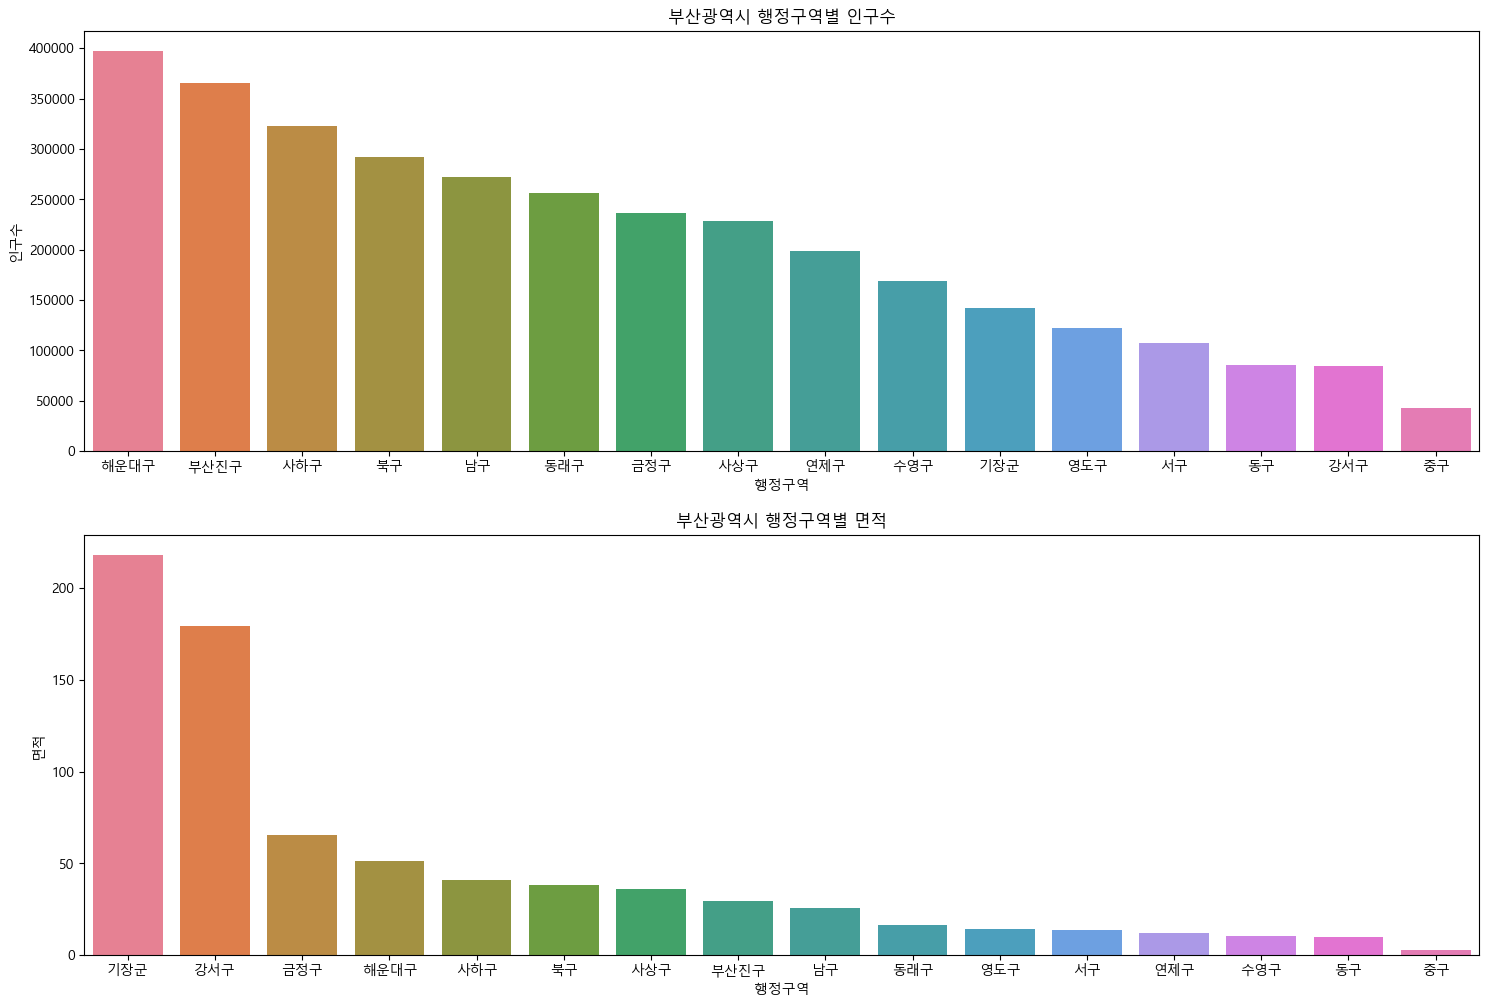

In [166]:

show_pop_area('부산광역시')

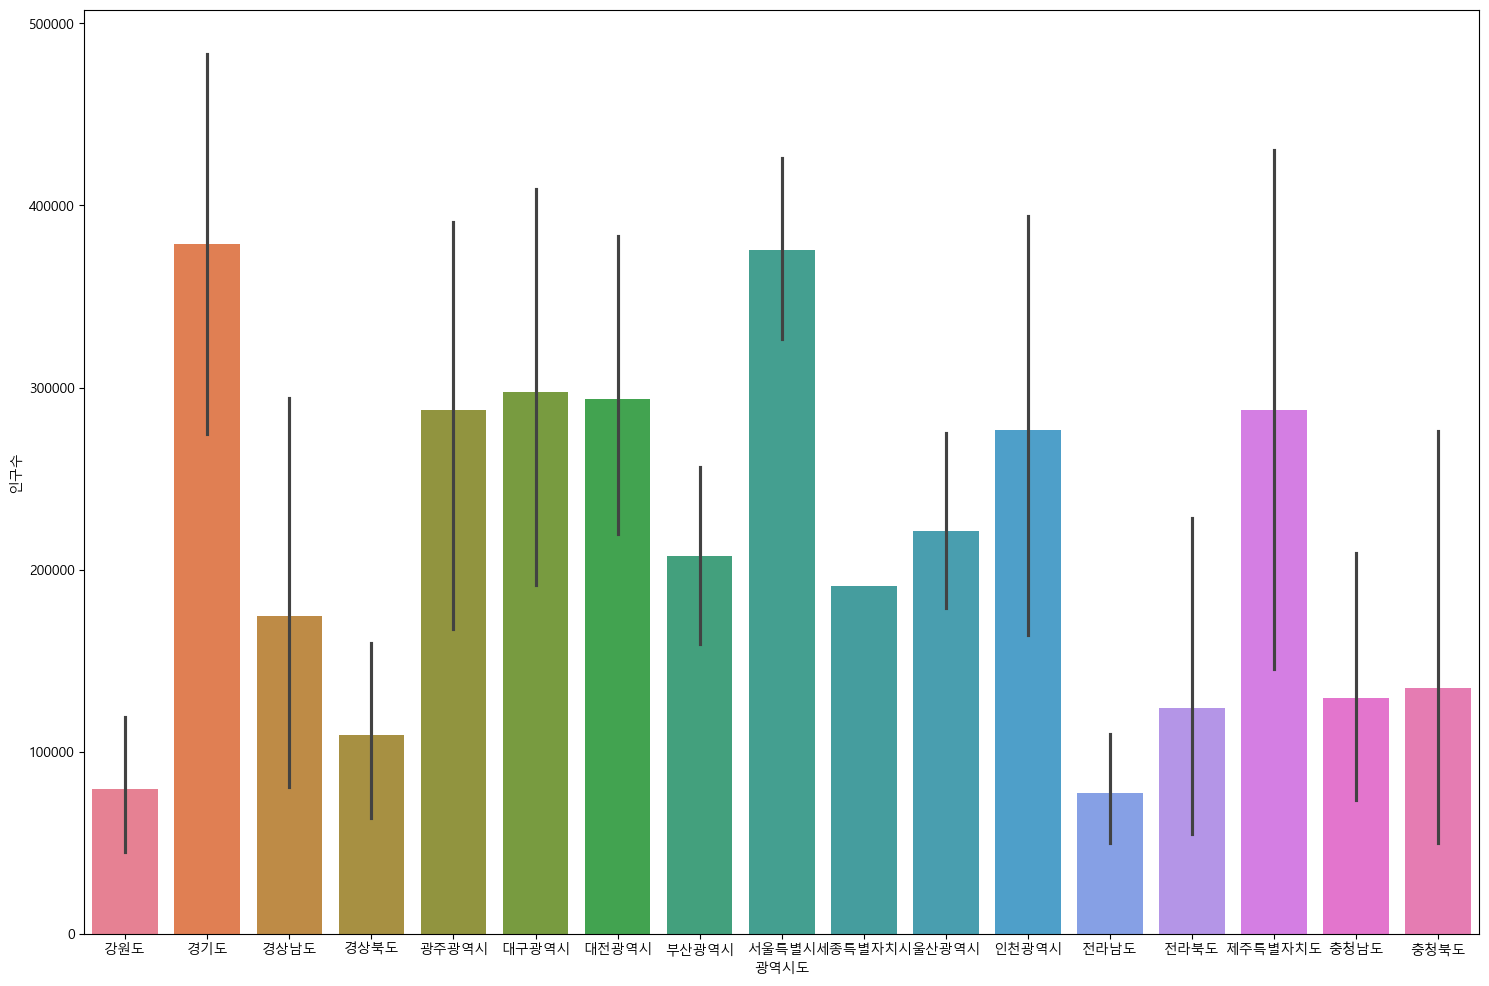

In [167]:
# 전국데이터의 광역시도의 인구수 
figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axes1, hue='광역시도')
plt.show()

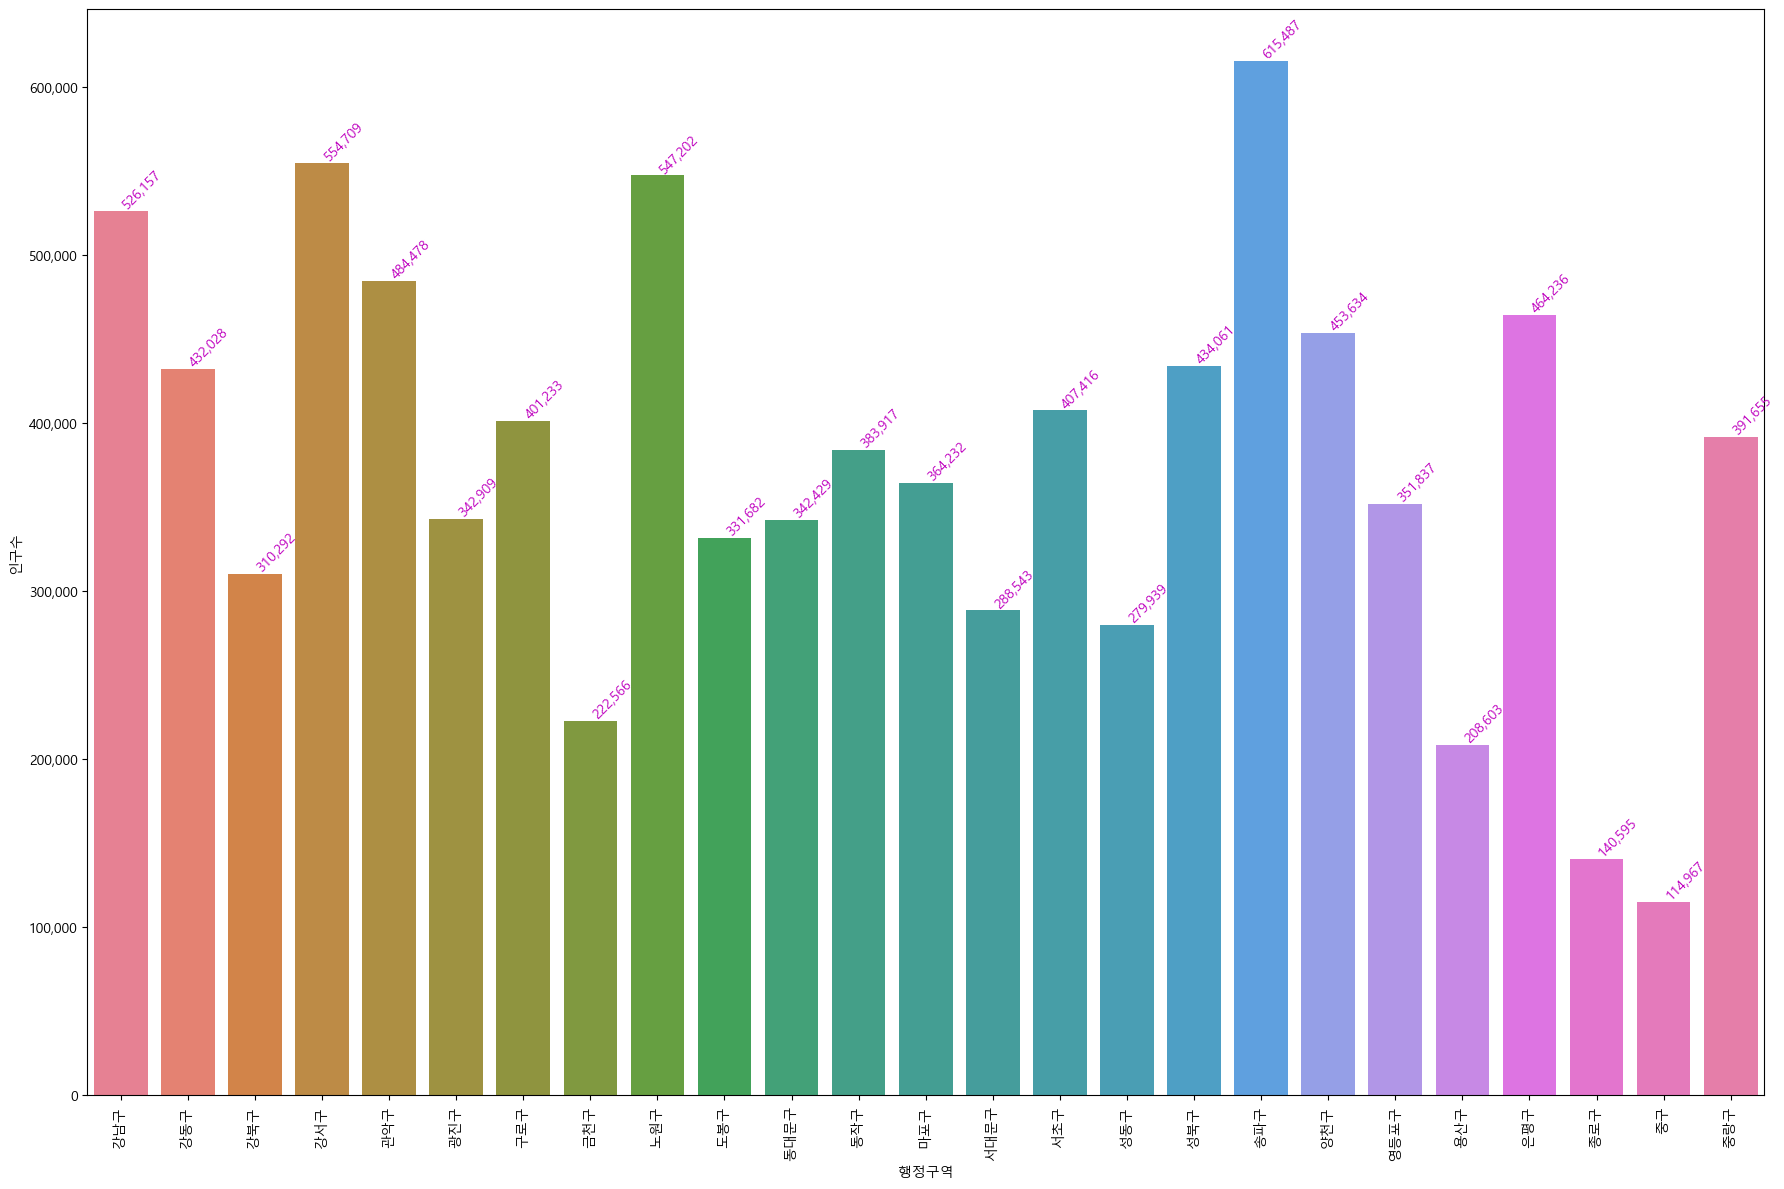

In [175]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


for item in ax1.get_xticklabels(): 
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].items()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

In [169]:
# Plot을 image 파일로 저장하기
figure.savefig('data/서울인구수.png',bbox_inches='tight')
figure.savefig('data/서울인구수2.png')

In [170]:
seoul_df['인구수'].items()


In [174]:
for idx, val in enumerate(seoul_df["인구수"].items()):
    print(f'{idx} {val}')

0 (124, 526157)
1 (125, 432028)
2 (126, 310292)
3 (127, 554709)
4 (128, 484478)
5 (129, 342909)
6 (130, 401233)
7 (131, 222566)
8 (132, 547202)
9 (133, 331682)
10 (134, 342429)
11 (135, 383917)
12 (136, 364232)
13 (137, 288543)
14 (138, 407416)
15 (139, 279939)
16 (140, 434061)
17 (141, 615487)
18 (142, 453634)
19 (143, 351837)
20 (144, 208603)
21 (145, 464236)
22 (146, 140595)
23 (147, 114967)
24 (148, 391655)
